### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ["EIN", "NAME","SPECIAL_CONSIDERATIONS", "STATUS", "ASK_AMT"])
print(application_df.shape)
application_df.head(10)

(34299, 7)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,1
5,T3,Independent,C1200,Preservation,Trust,0,1
6,T3,Independent,C1000,Preservation,Trust,100000-499999,1
7,T3,Independent,C2000,Preservation,Trust,10M-50M,1
8,T7,Independent,C1000,ProductDev,Trust,1-9999,1
9,T5,CompanySponsored,C3000,ProductDev,Association,0,0


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           9
IS_SUCCESSFUL        2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

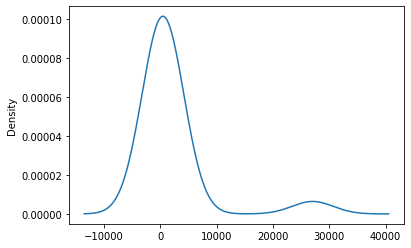

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
# use 500
replace_application = list(app_type_count[app_type_count <500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
unique_class = application_df.CLASSIFICATION.nunique()
class_count = application_df.CLASSIFICATION.value_counts()
print(unique_class)
print(class_count)

71
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C1732        1
C1283        1
C3700        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64


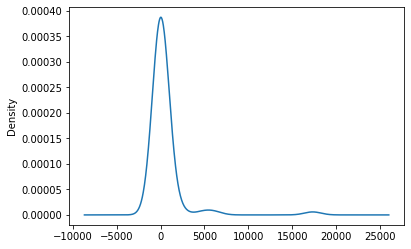

In [8]:
# Visualize the value counts of CLASSIFICATION
class_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
# use 1000 for fewer bins
replace_class = list(class_count[class_count < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
# name categorical_cat - used in the next cell
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(columns = "IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
# hidden_nodes_layer2 = 80
# hidden_nodes_layer3 = 20


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4000      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 4,101
Trainable params: 4,101
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 759us/step - loss: 0.5882 - accuracy: 0.7096
Epoch 2/100
195/804 [======>.......................] - ETA: 0s - loss: 0.5669 - accuracy: 0.7298
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 844us/step - loss: 0.5748 - accuracy: 0.7236
Epoch 3/100
378/804 [=============>................] - ETA: 0s - loss: 0.5744 - accuracy: 0.7198
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 814us/step - loss: 0.5723 - accuracy: 0.7236
Epoch 4/100
531/804 [==================>...........] - ETA: 0s - loss: 0.5749 - accuracy: 0.7216
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 900us/step - loss: 0.5698 - accuracy: 0.7254
Epoch 5/100
744/804 [==========================>...] - ETA: 0s - loss: 0.5688 - accuracy: 0.7257
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 

804/804 [==============================] - 1s 842us/step - loss: 0.5383 - accuracy: 0.7398
Epoch 76/100
651/804 [=======================>......] - ETA: 0s - loss: 0.5405 - accuracy: 0.7361
Epoch 00076: saving model to checkpoints\weights.76.hdf5
804/804 [==============================] - 1s 796us/step - loss: 0.5383 - accuracy: 0.7383
Epoch 77/100
804/804 [==============================] - 1s 766us/step - loss: 0.5382 - accuracy: 0.7396
Epoch 78/100
 63/804 [=>............................] - ETA: 0s - loss: 0.5413 - accuracy: 0.7401
Epoch 00078: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 1s 788us/step - loss: 0.5383 - accuracy: 0.7390
Epoch 79/100
254/804 [========>.....................] - ETA: 0s - loss: 0.5372 - accuracy: 0.7426
Epoch 00079: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 1s 779us/step - loss: 0.5382 - accuracy: 0.7390
Epoch 80/100
461/804 [================>.............] - ETA: 0s - l

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5542 - accuracy: 0.7252
Loss: 0.5541519522666931, Accuracy: 0.7252478003501892


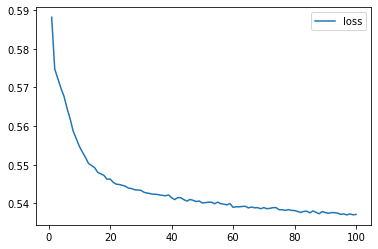

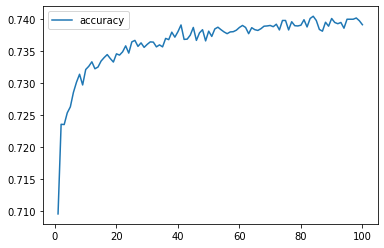

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
# score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input
history_df.plot(y="loss")
# Plot the accuracy
# the higher the better 
history_df.plot(y="accuracy")

In [21]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_06.h5")